# Baktash Ansari 
## Student Id: 99521082

In [90]:
%pip install gym
%pip install gym[classic_control]
import gym

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
%pip install scikit-fuzzy
%pip install imageio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [92]:
import gym
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the input and output


In [93]:
y_position = ctrl.Antecedent(np.arange(-1, 1.0 + 0.1, 0.1), 'y_position')

x_position = ctrl.Antecedent(np.arange(-1, 1.0 + 0.1, 0.1), 'x_position')

ang_velocity = ctrl.Antecedent(np.arange(-8, 8 + 0.8, 0.8), 'ang_velocity')

# define the output (action)
action = ctrl.Consequent(np.arange(-2, 2 + 0.2, 0.2), 'action')

In [94]:
# define the membership functions for y_position
y_position['vr'] = fuzz.trimf(y_position.universe, [-1, -0.6, -0.2])
y_position['r'] = fuzz.trimf(y_position.universe, [-0.2, -0.1, 0])

y_position['l'] = fuzz.trimf(y_position.universe, [0, 0.1, 0.2])
y_position['vl'] = fuzz.trimf(y_position.universe, [0.2, 0.6, 1])

# define the membership functions for x_position
x_position['pos'] = fuzz.trimf(x_position.universe, [0, 0.5, 1])
x_position['neg'] = fuzz.trimf(x_position.universe, [-1, -0.5, 0])

# define the membership functions for ang_velocity
ang_velocity['cw_h'] = fuzz.trimf(ang_velocity.universe, [-8, -6, -4])
ang_velocity['cw_m'] = fuzz.trimf(ang_velocity.universe, [-4, -3, -2])
ang_velocity['cw_l'] = fuzz.trimf(ang_velocity.universe, [-2, -1, 0])

ang_velocity['ccw_l'] = fuzz.trimf(ang_velocity.universe, [0, 1, 2])
ang_velocity['ccw_m'] = fuzz.trimf(ang_velocity.universe, [2, 3, 4])
ang_velocity['ccw_h'] = fuzz.trimf(ang_velocity.universe, [4, 6, 8])

ang_velocity['neg'] = fuzz.trimf(ang_velocity.universe, [-8, -4, 0])
ang_velocity['pos'] = fuzz.trimf(ang_velocity.universe, [0, 4, 8])


# define the membership functions for action
action['cw_h'] = fuzz.trimf(action.universe, [-2, -1.75, -1.5])
action['cw_m'] = fuzz.trimf(action.universe, [-1.5, -1, -0.5])
action['cw_l'] = fuzz.trimf(action.universe, [-0.5, -0.25, 0])

action['ccw_l'] = fuzz.trimf(action.universe, [0, 0.25, 0.5])
action['ccw_m'] = fuzz.trimf(action.universe, [0.5, 1, 1.5])
action['ccw_h'] = fuzz.trimf(action.universe, [1.5, 1.75, 2])

action['nothing'] = fuzz.trimf(action.universe, [-0.1, 0, 0.1])

# define the rules

#right down
r1 = ctrl.Rule((y_position['r'] | y_position['vr']) & x_position['neg'] & (ang_velocity['ccw_l'] | ang_velocity['ccw_m'] | ang_velocity['ccw_h']), action['ccw_h'])
r2 = ctrl.Rule((y_position['r'] | y_position['vr']) & x_position['neg'] & ang_velocity['cw_h'], action['nothing'])
r3 = ctrl.Rule((y_position['r'] | y_position['vr']) & x_position['neg'] & ang_velocity['neg'], action['nothing'])

#left down
r4 = ctrl.Rule((y_position['l'] | y_position['vl']) & x_position['neg'] & (ang_velocity['cw_l'] | ang_velocity['cw_m']), action['cw_h'])
r5 = ctrl.Rule((y_position['l'] | y_position['vl']) & x_position['neg'] & ang_velocity['cw_h'], action['nothing'])
r6 = ctrl.Rule((y_position['l'] | y_position['vl']) & x_position['neg'] & ang_velocity['ccw_h'], action['nothing'])
r7 = ctrl.Rule((y_position['l'] | y_position['vl']) & x_position['neg'] & ang_velocity['pos'], action['nothing'])

#right up
r8 = ctrl.Rule((y_position['r']) & x_position['pos'] & ang_velocity['cw_l'], action['ccw_m'])
r9 = ctrl.Rule((y_position['r']) & x_position['pos'] & ang_velocity['cw_h'], action['ccw_h'])
r10 = ctrl.Rule((y_position['r']) & x_position['pos'] & ang_velocity['cw_m'], action['ccw_h'])

r11 = ctrl.Rule((y_position['r']) & x_position['pos'] & ang_velocity['ccw_m'], action['cw_m'])
r12 = ctrl.Rule((y_position['r']) & x_position['pos'] & ang_velocity['ccw_h'], action['cw_m'])
r13 = ctrl.Rule((y_position['r']) & x_position['pos'] & ang_velocity['ccw_l'], action['cw_m'])

r14 = ctrl.Rule((y_position['vr']) & x_position['pos'] & ang_velocity['neg'], action['nothing'])

r15 = ctrl.Rule((y_position['r'] | y_position['vr']) & x_position['pos'] & ang_velocity['pos'], action['nothing'])


#left up
r16 = ctrl.Rule((y_position['l']) & x_position['pos'] & ang_velocity['ccw_l'], action['cw_h'])
r17 = ctrl.Rule((y_position['l']) & x_position['pos'] & ang_velocity['ccw_h'], action['cw_h'])
r18 = ctrl.Rule((y_position['l']) & x_position['pos'] & ang_velocity['ccw_m'], action['cw_h'])

r19 = ctrl.Rule((y_position['vl']) & x_position['pos'] & ang_velocity['pos'], action['cw_h'])

r20 = ctrl.Rule((y_position['l'] | y_position['vl']) & x_position['pos'] & ang_velocity['neg'], action['nothing'])

# create the control system
action_ctrl = ctrl.ControlSystem(
    [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10,
     r11, r12, r13, r14, r15, r16, r17, r18, r19, r20]
)

# create the simulation
action_simulation = ctrl.ControlSystemSimulation(action_ctrl)

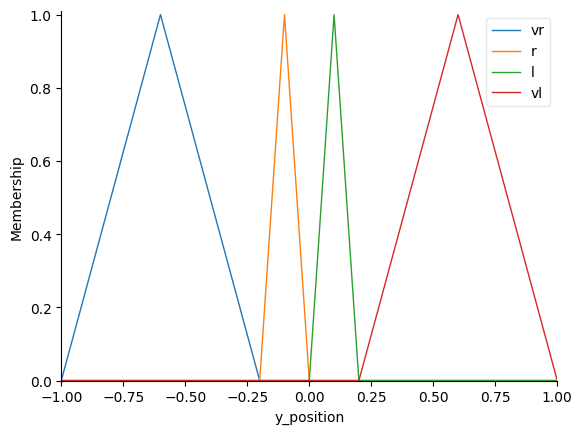

In [95]:
y_position.view()

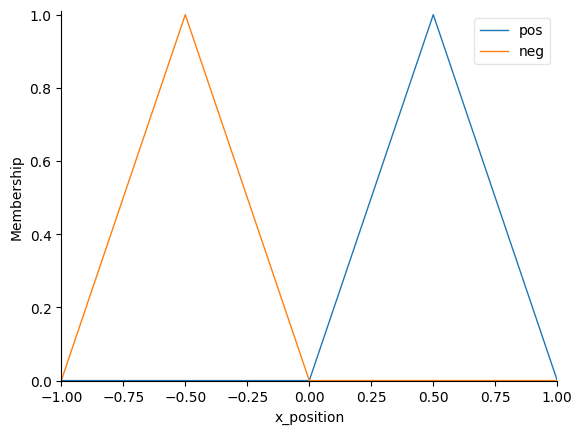

In [96]:
x_position.view()

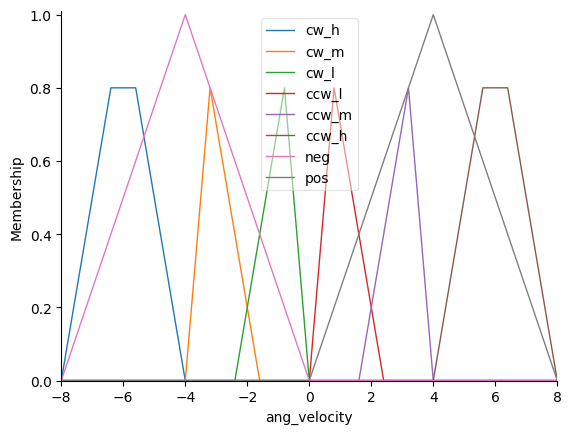

In [97]:
ang_velocity.view()

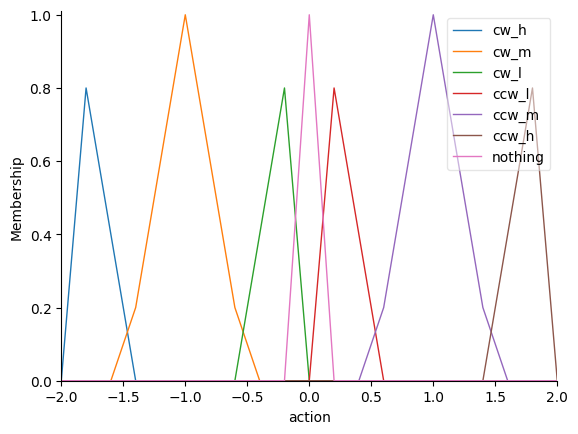

In [98]:
action.view()

In [99]:
# define a function to compute the output according to the given inputs
def get_action(state, pendulum_ctrl):
    print("State: ", state)
    pendulum_ctrl.input['x_position'] = state[0]
    pendulum_ctrl.input['y_position'] = state[1]
    pendulum_ctrl.input['ang_velocity'] = state[2]

    # check for missing inputs
    for antecedent in pendulum_ctrl.ctrl.antecedents:
        if antecedent.input[pendulum_ctrl] is None:
            print(f"Missing input for: {antecedent}")
    
    pendulum_ctrl.compute()
    
    return [pendulum_ctrl.output['action']]

In [100]:
environment = gym.make('Pendulum-v1', g=9.81, render_mode="human") 

In [101]:
# max number of steps
steps_num = 500

In [102]:
import time

# take actions according to the given controller
def run_render(environment, pendulum_ctrl, steps_num):

    # get initial state
    state, _ = environment.reset()
    
    total_reward = 0
    
    # to store the rewards
    rewards = []
    

    # iterate over the steps
    for step in range(steps_num):
        
        # render the environment
        environment.render()

        action = get_action(state, pendulum_ctrl)

        next_state, reward, done1, done2, __ = environment.step(action)
        

        print('reward     : ', reward)
        

        print('next_state : ', next_state)
        

        print('step number: ', step)
        
        total_reward += reward
        
        rewards.append(reward)
        
        state = next_state
                    
           

    
    # print final results
    print('number of steps: ', step, '\nfinal reward   : ', reward, '\ntotal reward   : ', total_reward)
    environment.close()
    return rewards

In [103]:
rewards = run_render(environment, action_simulation, steps_num)

State:  [0.5968811  0.8023297  0.67492867]
reward     :  -0.9155889004423271
next_state :  [0.55567276 0.8314011  1.008723  ]
step number:  0
State:  [0.55567276 0.8314011  1.008723  ]
reward     :  -1.0682790758306322
next_state :  [0.49775767 0.8673161  1.3632097 ]
step number:  1
State:  [0.49775767 0.8673161  1.3632097 ]
reward     :  -1.2908369834834363
next_state :  [0.42035502 0.9073597  1.7434988 ]
step number:  2
State:  [0.42035502 0.9073597  1.7434988 ]
reward     :  -1.5995930138183418
next_state :  [0.32038373 0.94728786 2.15404   ]
step number:  3
State:  [0.32038373 0.94728786 2.15404   ]
reward     :  -2.016089038098115
next_state :  [0.19513403 0.9807766  2.5948086 ]
step number:  4
State:  [0.19513403 0.9807766  2.5948086 ]
reward     :  -2.56518472511752
next_state :  [0.04333209 0.99906075 3.060969  ]
step number:  5
State:  [0.04333209 0.99906075 3.060969  ]
reward     :  -3.2729491993820203
next_state :  [-0.13330662  0.99107486  3.541006  ]
step number:  6
State:

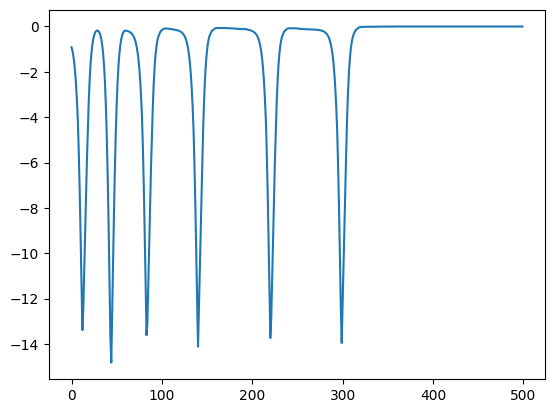

In [105]:
# plot the rewards over the steps
plt.plot(rewards)